<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Text(0.5, 1.0, 'Top 20 Genres on Netflix')

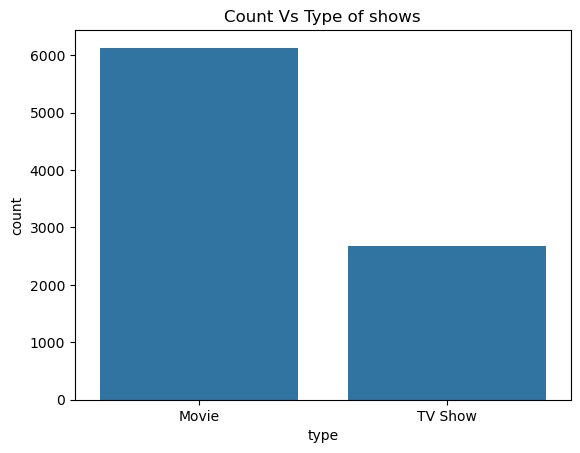

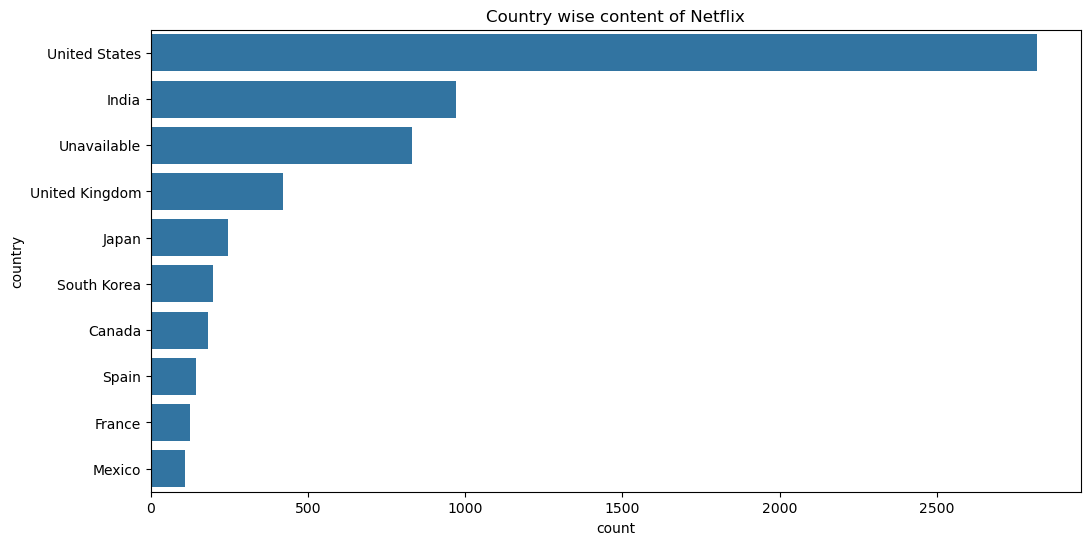

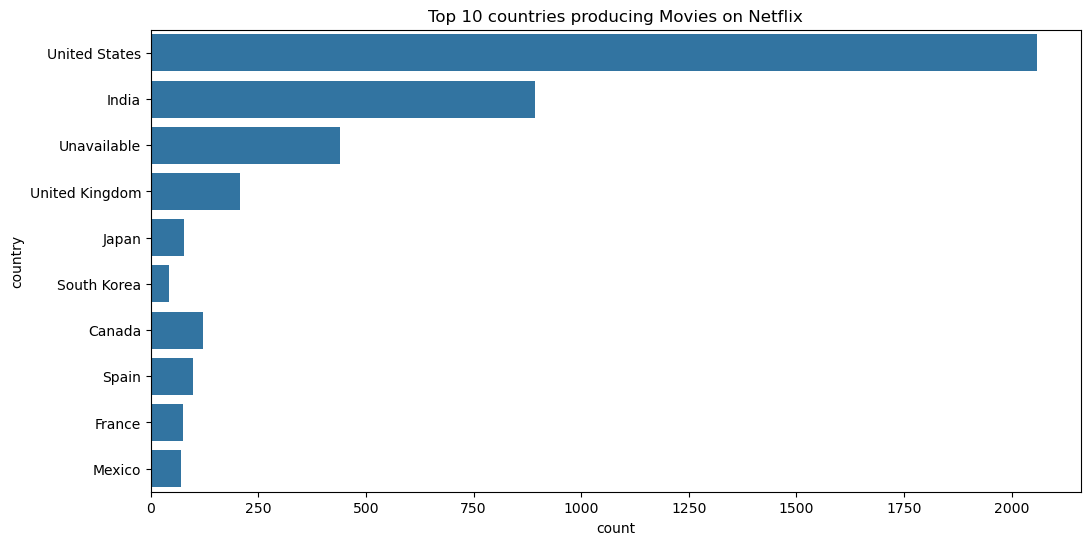

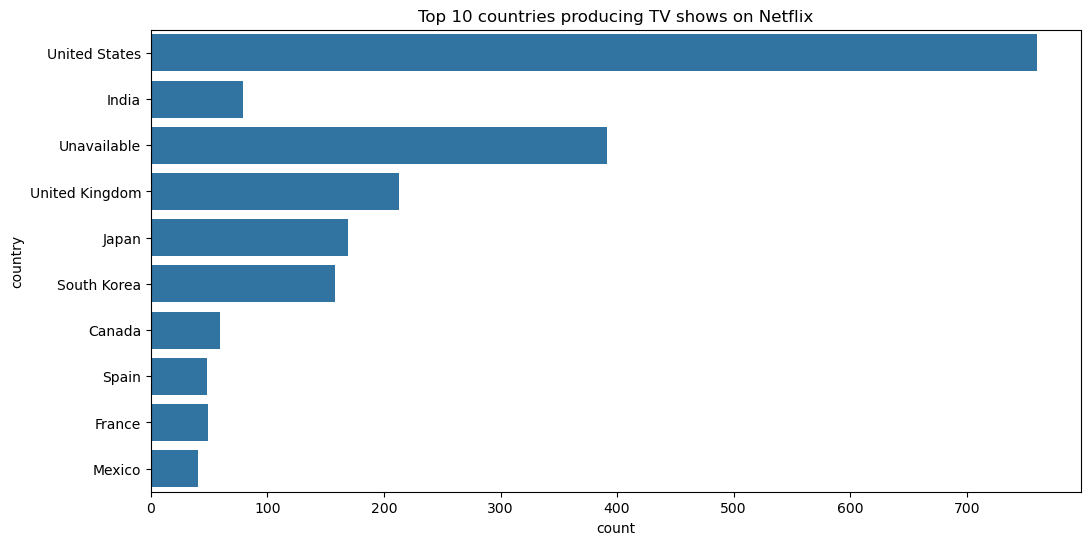

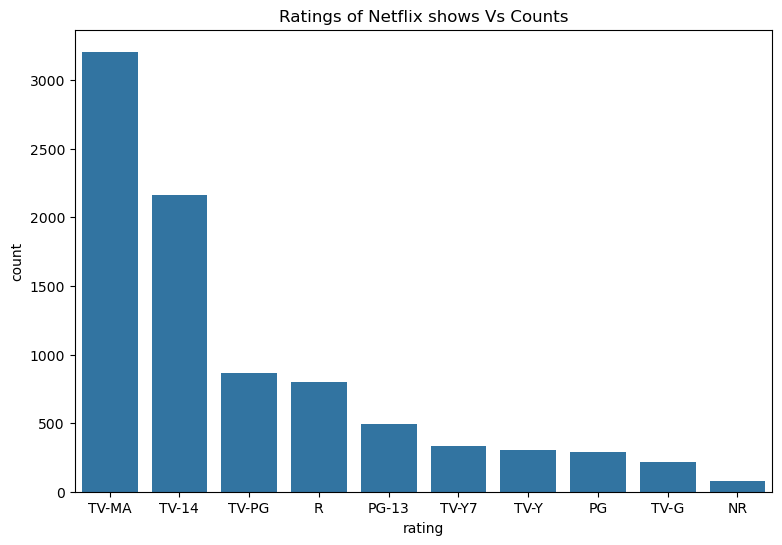

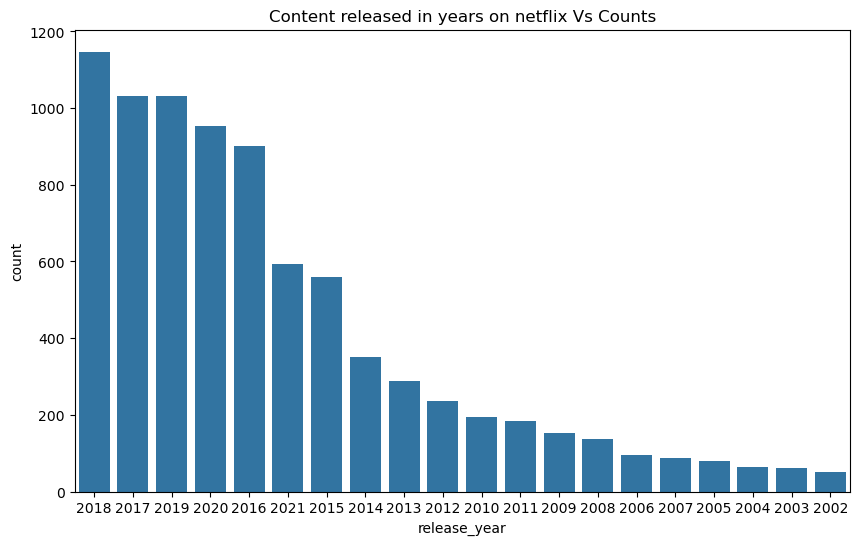

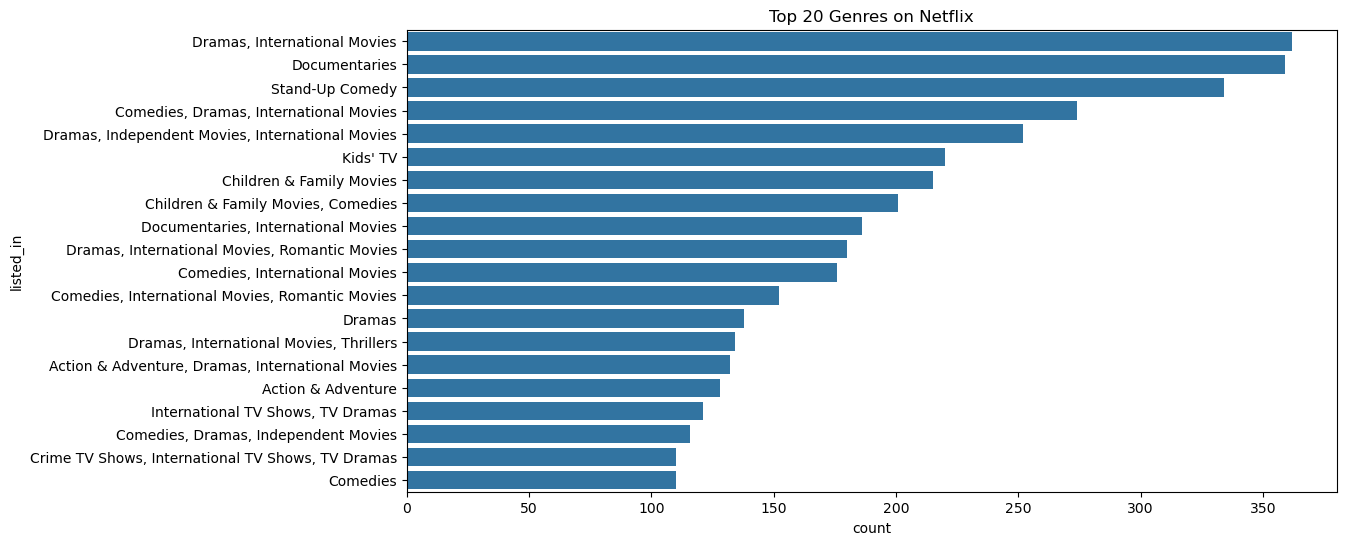

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head() # to show 5 values by default

netflix_data.shape # for the number of ros and columns

netflix_data.describe() # for the basic stats of the columns works only on the integer data data type

netflix_data.info()  # for data types and count of columns

netflix_data.isna()  # for missing values True -- NA values, False -- Non NA values

netflix_data.isna().sum() # for the count of NA values in each column

# Handling missing values - Columns which don't need any fills 'show_id, type, title, release_year, listed_in, description'
# Columns which need to be filled - 'director, cast, country, date_added, rating, duration' 

# converting the datatype of date_addeed column from object to datetime64

netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format='mixed', errors='coerce') # used format as mixed as the dataset had multiple date formats
netflix_data.head() 

# Filling 'Unavailable' as the filling value in the column which has datatype as string

netflix_data.fillna({'director': 'Unavailable', 'cast': 'Unavailable', 'country': 'Unavailable', 'rating': 'Unavailable'}, inplace=True)
netflix_data.isna().sum()

# Filling the NA values in the 'date_added' column with the most recent date of the dataset

netflix_data[netflix_data.date_added.isnull()]

most_recent_entry_date=netflix_data['date_added'].max()
netflix_data.fillna({'date_added': most_recent_entry_date}, inplace=True)
netflix_data.isna().sum()

# Showing that the values of date_added column have  been filled using showid
netflix_data[netflix_data.show_id == 's6067']

# Data cleansing for duration column
netflix_data[netflix_data.duration.isnull()]

#the duration column data is in rating column hence overwriting the data of duration column with rating column data
netflix_data[netflix_data.director == 'Louis C.K.'].head() # to avoid accidental overwriting of the correct data with the same director

#Overwriting the data of 'duration' column and checking, 'loc' helps in easy accessing the columns by name
netflix_data.loc[netflix_data['director'] == 'Louis C.K.', 'duration'] = netflix_data['rating']
netflix_data[netflix_data.director == 'Louis C.K.'].head()

#Overwriting the data of 'rating' column and checking
netflix_data.loc[netflix_data['director'] == 'Louis C.K.', 'rating'] = 'Unavailable'
netflix_data[netflix_data.director == 'Louis C.K.'].head()


# VISUALIZATION 
# 1] By type
netflix_data.type.value_counts() # 'value_counts' method shows the different categories or types of data present in a given column

# countplot helps us to plot the counts of each category
sns.countplot(x = 'type', data = netflix_data)
plt.title('Count Vs Type of shows')

# 2] By Country only top 10 as there are many countries 
netflix_data['country'].value_counts().head(10)

plt.figure(figsize =(12,6)) #defining the figure size of the plot
sns.countplot(y = 'country', order = netflix_data['country'].value_counts().index[0:10], data  = netflix_data) # order means highest value on top and likewise 
plt.title('Country wise content of Netflix')

# 3] By type of content based on country

# defining 2 new variables for the differentiation

movie_countries = netflix_data[netflix_data['type'] == 'Movie']
tv_show_countries = netflix_data[netflix_data['type'] == 'TV Show']

plt.figure(figsize =(12,6)) #defining the figure size of the plot
sns.countplot(y = 'country', order = netflix_data['country'].value_counts().index[0:10], data  = movie_countries) # order means highest value on top and likewise 
plt.title('Top 10 countries producing Movies on Netflix')


plt.figure(figsize =(12,6)) #defining the figure size of the plot
sns.countplot(y = 'country', order = netflix_data['country'].value_counts().index[0:10], data  = tv_show_countries) # order means highest value on top and likewise 
plt.title('Top 10 countries producing TV shows on Netflix')

# 4] By rating given to netflix content

netflix_data.rating.value_counts()

plt.figure(figsize =(9,6)) #defining the figure size of the plot
sns.countplot(x = 'rating', order = netflix_data['rating'].value_counts().index[0:10], data  = netflix_data) # order means highest value on top and likewise 
plt.title('Ratings of Netflix shows Vs Counts')

# 5] By release year - in which year netflix has produced most content

netflix_data.release_year.value_counts()[:20] # Top 20 values

plt.figure(figsize =(10,6)) #defining the figure size of the plot
sns.countplot(x = 'release_year', order = netflix_data['release_year'].value_counts().index[0:20], data  = netflix_data) # order means highest value on top and likewise 
plt.title('Content released in years on netflix Vs Counts')

# 6] By popular Genres of the content on Netflix

netflix_data.listed_in.value_counts()[:20] # Top 20 values

plt.figure(figsize =(12,6)) #defining the figure size of the plot
sns.countplot(y = 'listed_in', order = netflix_data['listed_in'].value_counts().index[0:20], data  = netflix_data) # order means highest value on top and likewise 
plt.title('Top 20 Genres on Netflix')

# Summary/ Findings 
# Based on the analysis we did with the data, we can say that - 
# 1] Netflix has more movies than TV shows
# 2] Most number of Movies and TV shows are produced by United states, followed by India
# 3] Most of the content on Netflix [Movies + TV shows] is for Mature audiences i.e., heighest rating is 'TV MA'
# 4] 2018 is the year in which Netflix produced the most content in comparison with the other years 
# 5] Dramas and INternational Movies are the most popular genres on the Netflix.